# Coal production in mines

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor 
#input = true & predicted
from sklearn.metrics import explained_variance_score, r2_score, mean_squared_error 

sns.set();

C:\Users\Ja9\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is C41F-5117

 Directory of C:\Users\Ja9\Documents\GitHub\jupyter_coal\jupyter_coal\deliver

26/01/2017  21:58    <DIR>          .
26/01/2017  21:58    <DIR>          ..
26/01/2017  20:41    <DIR>          .ipynb_checkpoints
26/01/2017  08:26             4,719 YYYY-MM-DD_data cleaning.ipynb
26/01/2017  21:58           249,844 YYYY-MM-DD_final analysis.ipynb
               2 File(s)        254,563 bytes
               3 Dir(s)  10,649,628,672 bytes free


## Cleaned data:

This data have been cleaned and stored in: deliver/YYYY-MM-DD_data cleaning.ipynb

In [3]:
df = pd.read_csv("../data/cleaned_coal_data.csv", index_col='MSHA ID')
df[['Year','Mine_Name']].head()

,Year,Mine_Name
MSHA ID,,
103381,2013,Tacoa Highwall Miner
103404,2013,Reid School Mine
100759,2013,North River #1 Underground Min
103246,2013,Bear Creek
103451,2013,Knight Mine


## Predict production of mines

In [4]:
#numerical
features = ['Average_Employees',
            'Labor_Hours',
           ]
#non-numerical - have to turn into numbers with dummy vars
categoricals = ['Mine_State',
                'Mine_County',
                'Mine_Status',
                'Mine_Type',
                'Company_Type',
                'Operation_Type',
                'Operating_Company',
                'Union_Code',
                'Coal_Supply_Region',
               ]

target = 'log_production'

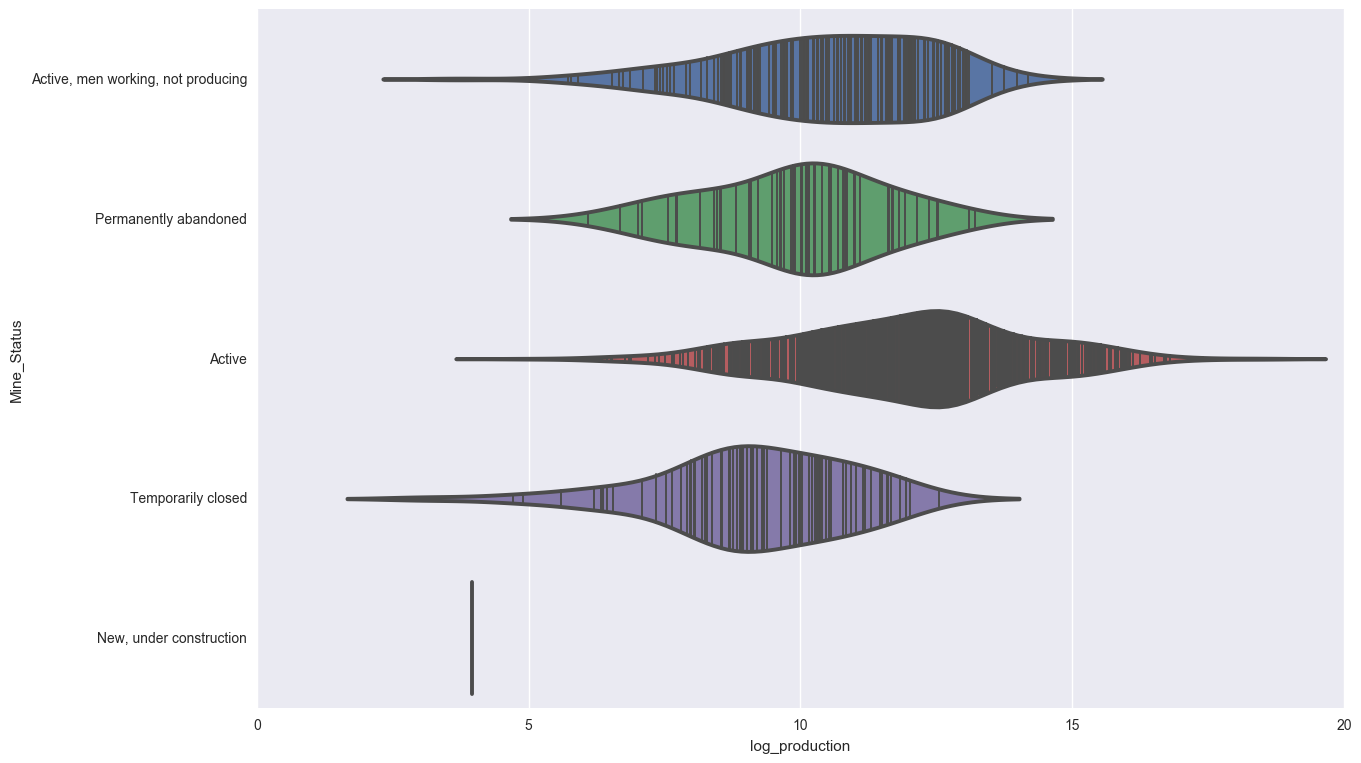

In [5]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Mine_Status",x="log_production",
              data=df,split=True,inner="stick")
plt.tight_layout()
plt.savefig("../figures/Mine_status_vs_log_production.png")

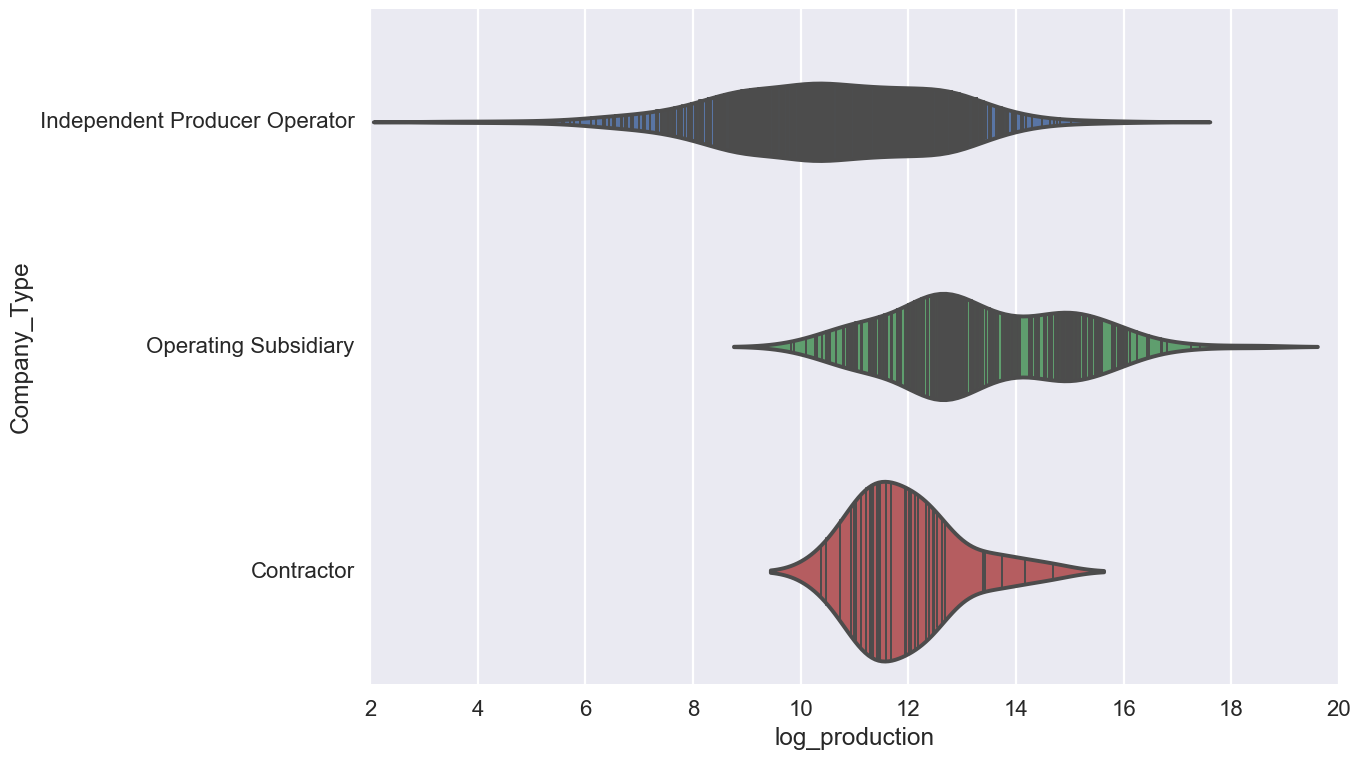

In [6]:
fig = plt.subplots(figsize=(14,8))
sns.set_context('poster')
sns.violinplot(y="Company_Type",x="log_production",
              data=df,split=True,inner="stick")
plt.tight_layout()
plt.savefig("../figures/Coal_prediction_company_type_vs_log_production.png")

In [7]:
#turn vars into dummies
dummy_categoricals = []
for categorical in categoricals:
    #avoid trap of dummies
    drop_var = sorted(df[categorical].unique())[-1]
    temp_df = pd.get_dummies(df[categorical],prefix=categorical)
    df = pd.concat([df, temp_df], axis=1)
    temp_df.drop('_'.join([categorical, str(drop_var)]),axis=1,inplace=True)
    dummy_categoricals += temp_df.columns.tolist()

## Build a model - Random Forest Regressor

In [8]:
train, test = train_test_split(df, test_size=0.3)

In [9]:
rf = RandomForestRegressor(n_estimators=100, oob_score=True)

In [10]:
rf.fit(train[features + dummy_categoricals], train[target])

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=True, random_state=None,
           verbose=0, warm_start=False)

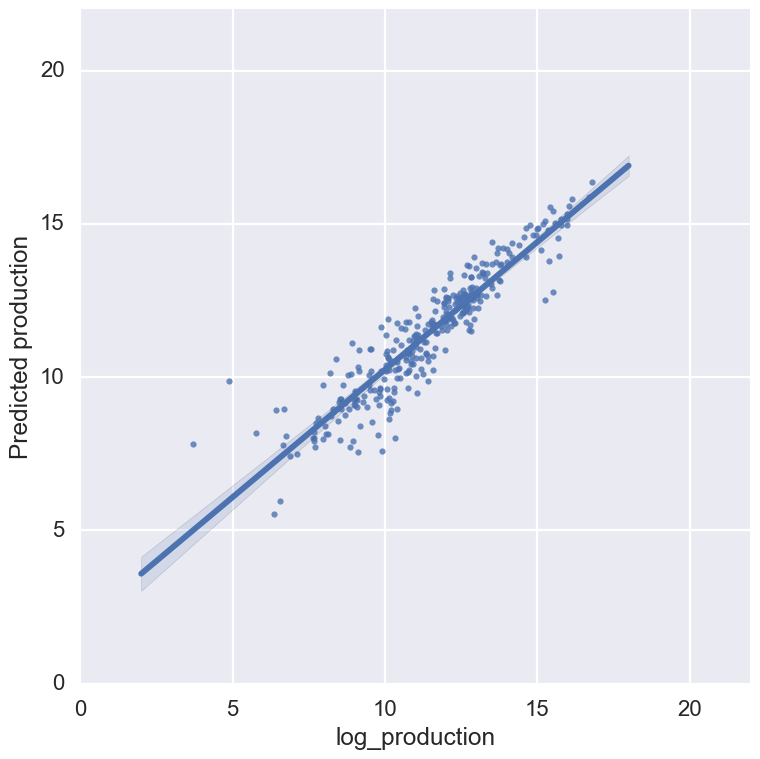

In [11]:
fig = plt.subplots(figsize=(8,8))
sns.regplot(test[target],rf.predict(test[features + dummy_categoricals]))
plt.ylabel("Predicted production")
plt.xlim(0,22)
plt.ylim(0,22)
plt.tight_layout()
plt.savefig("../figures/Coal_production_RF_prediction.png")

In [12]:
predicted = rf.predict(test[features + dummy_categoricals])
print("R^2 score: ",r2_score(test[target], predicted))
print("MSE: ",mean_squared_error(test[target], predicted))

R^2 score:  0.850394654265
MSE:  0.733949799394


In [13]:
rf_importances = pd.DataFrame({'name': train[features + dummy_categoricals].columns,
                              'importance': rf.feature_importances_
                              }).sort_values(by='importance', 
                                             ascending=False).reset_index(drop=True
pd.rf_importances.head(5)

SyntaxError: invalid syntax (<ipython-input-13-4f5d17797bd0>, line 5)

# Conclusion 